In [ ]:
from function import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('clinical_data_with_img_features.csv')
#delete rows with invalid values
data = data.loc[~(data == -999).any(axis=1)]

In [ ]:
# Select numerical columns
num_cols = [col for col in data.select_dtypes(include=np.number).columns if data[col].nunique() > 2]

# Standardize numerical columns
for col in num_cols:
    col_mean = data[col].mean()
    col_std = data[col].std()
    data[col] = (data[col] - col_mean) / col_std

In [ ]:
# remove the '%' symbol from the 'total_response_percent' column
data['total_response_percent'] = data['total_response_percent'].str.rstrip('%')
data['necrosis_percent'] = data['necrosis_percent'].str.rstrip('%')
data['fibrosis_percent'] = data['fibrosis_percent'].str.rstrip('%')
data['mucin_percent'] = data['mucin_percent'].str.rstrip('%')

# convert the 'total_response_percent' column to float
data['total_response_percent'] = data['total_response_percent'].astype(float)
data['necrosis_percent'] = data['necrosis_percent'].astype(float)
data['fibrosis_percent'] = data['fibrosis_percent'].astype(float)
data['mucin_percent'] = data['mucin_percent'].astype(float)

X = data.drop(['Patient-ID', 'De-identify Scout Name', 'progression_or_recurrence_liveronly', 'relevant_notes'], axis=1)

In [ ]:
# get the column names of the original data
original_column_names = X.columns

In [ ]:
features = X.columns.tolist()
X_to_train = pd.DataFrame(X[features][:])
y_to_train = data['progression_or_recurrence_liveronly'][:].values

In [ ]:
# Empty lists to store k values and accuracies
k_values = []
accuracies = []
max_accuracy = 0

In [ ]:
# Iterate through the range of number of features to select
for k in range(5, X_to_train.shape[1], 1):
    
    # Select the top k important features
    if isinstance(X_to_train, np.ndarray):
        X_selected, top_k = feature_selection(X_to_train, y_to_train, 5)
    else:
        X_selected, top_k = feature_selection(X_to_train.values, y_to_train, 5)
    
    features = [original_column_names[i] for i in top_k]

    X_train = data[features][:]
    y_train = data['progression_or_recurrence_liveronly'][:].values

    score = cross_validate(random_forest, X_to_train, y_to_train, 5)

    # Append k and its corresponding accuracy to the lists
    k_values.append(k)
    accuracies.append(np.round(score,3))

    if score > max_accuracy:
        max_accuracy = score
        optimal_features = original_column_names[top_k]
        optimal_k = k


In [ ]:
print(max_accuracy)

0.7402852049910874


In [ ]:
optimal_features

Index(['vital_status_DFS', 'months_to_DFS_progression',
       'progression_or_recurrence', 'vital_status_liver_DFS',
       'months_to_liver_DFS_progression'],
      dtype='object')

In [ ]:
optimal_k

7

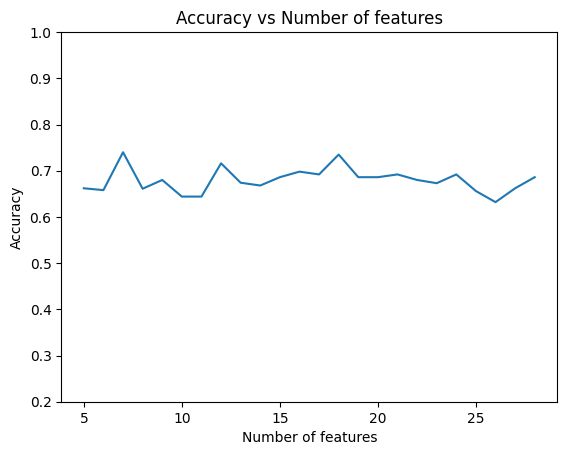

In [ ]:
# Plot the k values vs accuracies
plt.plot(k_values, accuracies)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of features')
plt.ylim([0.2, 1]) # set the y-axis limits to 0 and 1
plt.savefig('acc_vs_features.png')
plt.show()

In [ ]:
if isinstance(X_to_train, np.ndarray):
        features, correlations = feature_selection_value(X_to_train, y_to_train, original_column_names)
else:
        features, correlations = feature_selection_value(X_to_train.values, y_to_train, original_column_names)

<Figure size 1200x600 with 0 Axes>

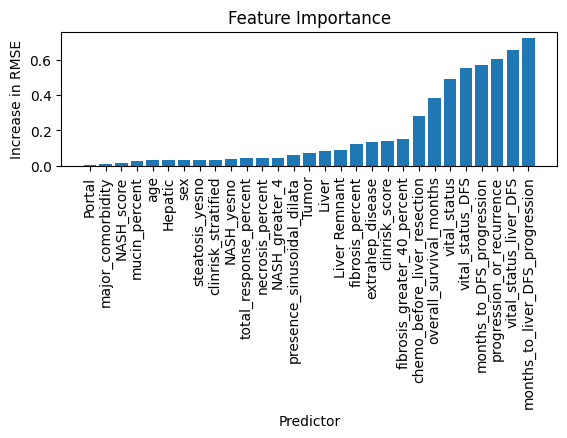

In [ ]:
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
fig.subplots_adjust(bottom= 0.6)
plt.bar(features, correlations)
plt.xticks(rotation=90)
plt.xlabel('Predictor')
plt.ylabel('Increase in RMSE')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

In [ ]:
# Select only the columns specified in the selected_features_list
X_optimal = X[optimal_features].to_numpy()
type(y_train)

numpy.ndarray

In [ ]:
# Perform cross-validation and get the mean accuracy and average confusion matrix
mean_accuracy, confusion_matrix = cross_validation_ConfusionMatrix(X_optimal, y_train, k=5)

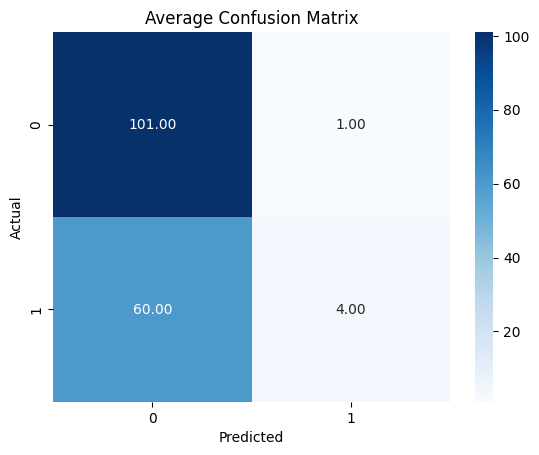

Mean Accuracy Score: 0.6317


In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Average Confusion Matrix')
plt.savefig('ave_confusion_matrix.png')
plt.show()
# Display the mean accuracy score
print(f"Mean Accuracy Score: {mean_accuracy:.4f}")